## Predict if a loan get approved or not

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving loan_train.csv to loan_train.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['loan_train.csv']))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.shape

(614, 13)

In [6]:
countu=0
countr=0
countsu=0
for i in df['Property_Area']:
    if i == 'Urban':
        countu+=1
    if i == 'Rural':
        countr+=1
    if i == 'Semiurban':
        countsu+=1
print("Total count of Ubran {}, Rural {}, Semiurban {} is".format(countu,countr,countsu))

Total count of Ubran 202, Rural 179, Semiurban 233 is


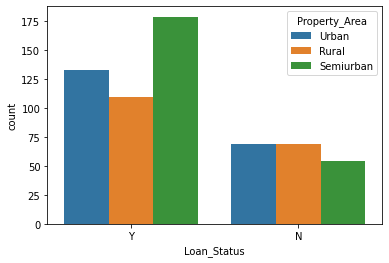

In [7]:
sns.countplot(x='Loan_Status', hue='Property_Area', data=df)
#data fount not much iformative so lets check another col

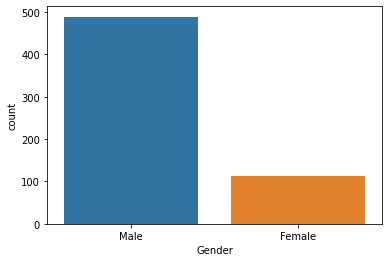

In [8]:
sns.countplot(x='Gender', data=df)

In [0]:
#its found that most of person are male
#so we can put nan value as male
df['Gender'].replace(np.nan, "Male", inplace=True)

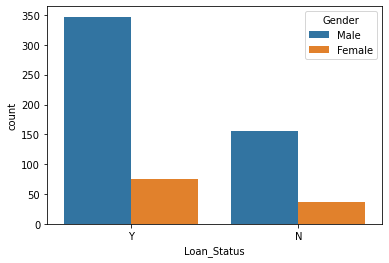

In [10]:
sns.countplot(x='Loan_Status', hue='Gender',data=df)
#data fount not much iformative so lets check another col

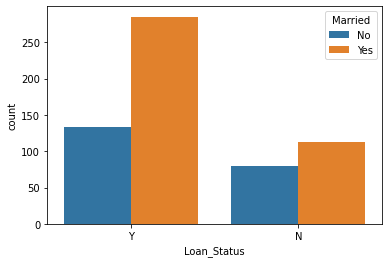

In [11]:
sns.countplot(x='Loan_Status' ,hue='Married', data=df)
#its found that most married people paid the loan

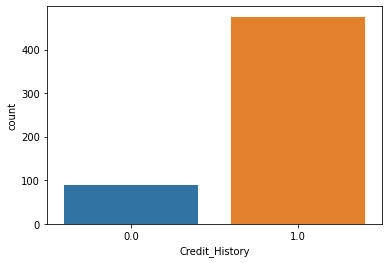

In [12]:
sns.countplot(x='Credit_History', data=df)

In [0]:
df['Credit_History'].replace(np.nan,1.0, inplace=True)

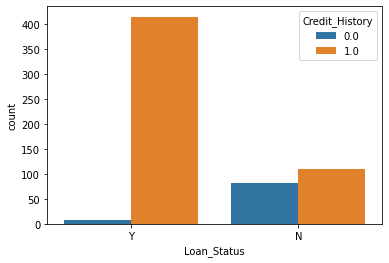

In [14]:
sns.countplot(x='Loan_Status', hue='Credit_History', data=df)
#its found that credit history is major feature of loan status

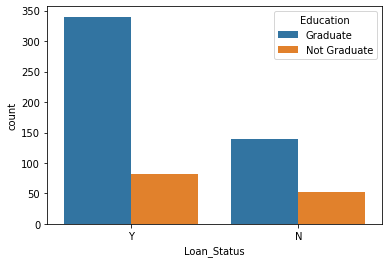

In [15]:
sns.countplot(x='Loan_Status', hue='Education', data=df)
#found Education is also major feature

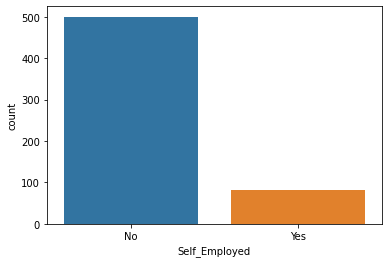

In [16]:
sns.countplot(x='Self_Employed', data=df)

In [0]:
#since majority is not self employed we can fill nan by no
df['Self_Employed'].replace(np.nan, "No", inplace=True)

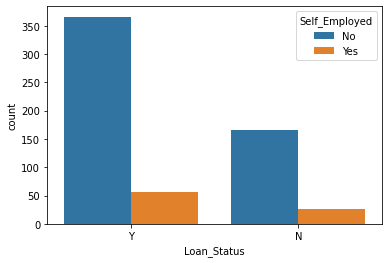

In [18]:
sns.countplot(x='Loan_Status', hue='Self_Employed', data=df)
#not being self employed is not important feature but a bit relatable

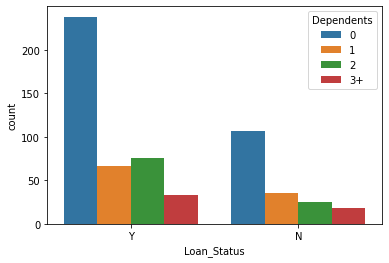

In [19]:
sns.countplot(x='Loan_Status', hue='Dependents', data=df)
#found 0 dependents mostly pay their loans

In [0]:
#its clear from above plot that most dependents is 0 so 
df['Dependents'].replace(np.nan,'0', inplace=True)

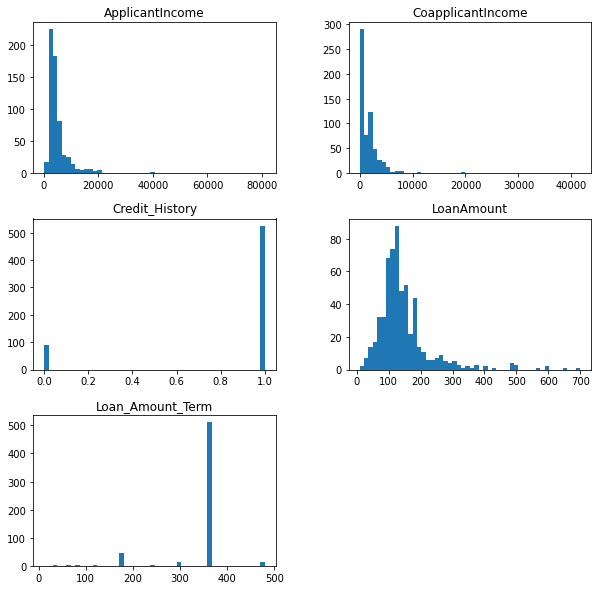

In [21]:
df.hist(bins=50, figsize=(10,10), grid=False)
plt.show()

In [0]:
df['Married'].replace(np.nan, "Yes", inplace=True)
df['Loan_Amount_Term'].replace(np.nan, 360.0, inplace=True)


In [23]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
df['LoanAmount'].replace(np.nan, df['LoanAmount'].mean(), inplace=True)

In [25]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

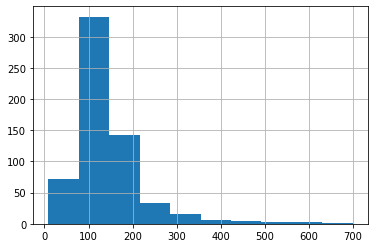

In [26]:
df['LoanAmount'].hist()

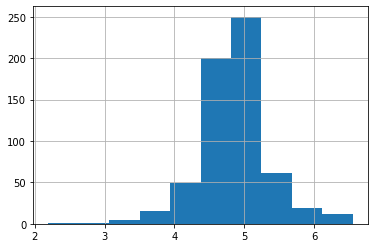

In [27]:
#positive outliers is found
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist()

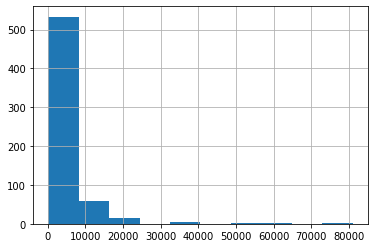

In [28]:
df['ApplicantIncome'].hist()

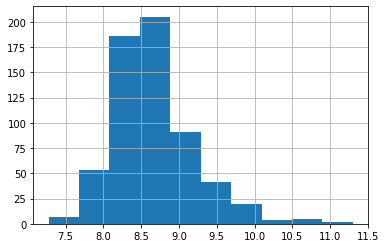

In [29]:
df['TotalIncome_log'] = np.log(df['ApplicantIncome'] + df['CoapplicantIncome'])
df['TotalIncome_log'].hist()

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,8.699515


In [0]:
df = df.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount"],axis=1)

In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,4.986426,8.674026
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,4.787492,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,4.948760,8.699515


In [33]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
LoanAmount_log      float64
TotalIncome_log     float64
dtype: object

In [34]:
from sklearn.preprocessing import LabelEncoder
categorical_column = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in categorical_column:
    df[i] = le.fit_transform(df[i])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,1,0,0,0,0,360.0,1.0,2,1,4.986426,8.674026
1,1,1,1,0,0,360.0,1.0,0,0,4.852030,8.714568
2,1,1,0,0,1,360.0,1.0,2,1,4.189655,8.006368
3,1,1,0,1,0,360.0,1.0,2,1,4.787492,8.505323
4,1,0,0,0,0,360.0,1.0,2,1,4.948760,8.699515


In [35]:
df.dtypes

Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int64
Loan_Status           int64
LoanAmount_log      float64
TotalIncome_log     float64
dtype: object

In [36]:
x_data = df.drop(['Loan_Status'], axis=1)
y_data = df['Loan_Status']
x_data.shape

(614, 10)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)
#Create the linear regression object
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
test_y_hat = logreg.predict(x_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))

Mean absolute error: 0.20
Residual sum of squares (MSE): 0.20


In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_y_hat)

0.7956989247311828

In [52]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_y_hat)
cnf_matrix
#13 and 61 values are correctly predicted

array([[13, 18],
       [ 1, 61]])

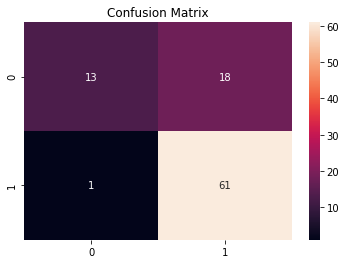

In [53]:
sns.heatmap(cnf_matrix, annot=True)
plt.title("Confusion Matrix")
plt.show()

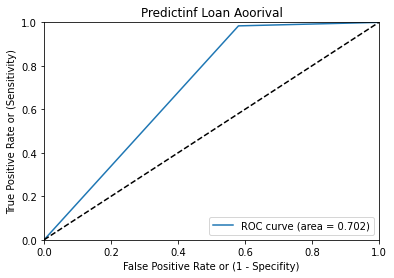

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, test_y_hat)
roc_auc = roc_auc_score(y_test, test_y_hat)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Predictinf Loan Aoorival')
plt.legend(loc="lower right")
